In [2]:
from utils import *

In [3]:
sns.color_palette()

[(0.30196078431372547, 0.23529411764705882, 0.1843137254901961),
 (0.7529411764705882, 0.44313725490196076, 0.33725490196078434),
 (0.7254901960784313, 0.6980392156862745, 0.6392156862745098),
 (0.6431372549019608, 0.21568627450980393, 0.1450980392156863),
 (0.9098039215686274, 0.7803921568627451, 0.403921568627451),
 (0.8117647058823529, 0.7411764705882353, 0.6078431372549019),
 (0.6823529411764706, 0.6901960784313725, 0.7019607843137254),
 (0.9294117647058824, 0.8431372549019608, 0.615686274509804),
 (0.4823529411764706, 0.49019607843137253, 0.5019607843137255),
 (0.9019607843137255, 0.7137254901960784, 0.6431372549019608),
 (0.27450980392156865, 0.2784313725490196, 0.28627450980392155),
 (0.6313725490196078, 0.8, 0.8941176470588236),
 (0.0, 0.5372549019607843, 0.5529411764705883),
 (0.22745098039215686, 0.3411764705882353, 0.5411764705882353),
 (0.7529411764705882, 0.8196078431372549, 0.6078431372549019),
 (0.4823529411764706, 0.4196078431372549, 0.34901960784313724),
 (0.6862745098039216, 0.7372549019607844, 0.8352941176470589),
 (0.4588235294117647, 0.592156862745098, 0.19215686274509805),
 (0.8784313725490196, 0.8352941176470589, 0.7411764705882353),
 (0.21176470588235294, 0.5725490196078431, 0.792156862745098),
 (0.6509803921568628, 0.7450980392156863, 0.396078431372549),
 (0.4235294117647059, 0.5294117647058824, 0.7019607843137254),
 (0.7529411764705882, 0.6, 0.4745098039215686),
 (0.592156862745098, 0.8274509803921568, 0.8),
 (0.43529411764705883, 0.7137254901960784, 0.8745098039215686),
 (0.8745098039215686, 0.6784313725490196, 0.13333333333333333),
 (0.3333333333333333, 0.6941176470588235, 0.7058823529411765)]

In [4]:
soybean = pd.read_csv(os.path.join(DATA, 'Soybean_Nasdaq.csv'), index_col='Date',
                      parse_dates=True, dayfirst=False)[['Close/Last']].rename(columns ={"Close/Last": 'Soybean'})*0.01
soybean_oil = pd.read_csv(os.path.join(DATA, 'SoybeanOil_Nasdaq.csv'), index_col='Date',
                          parse_dates=True, dayfirst=False)[['Close/Last']].rename(columns ={"Close/Last": 'Soybean Oil'})*0.01  # as per CME cent/lb
soybean_meal = pd.read_csv(os.path.join(DATA, 'SoybeanMeal_Nasdaq.csv'), index_col='Date', 
                           parse_dates=True, dayfirst=False)[['Close/Last']].rename(columns ={"Close/Last": 'Soybean Meal'})  # as per CME $/short ton
data = soybean.join(soybean_oil, how='outer').join(soybean_meal, how='outer').sort_index().ffill().dropna()
data['Crush Spread'] = data['Soybean Meal']*0.022 + data['Soybean Oil']*11 - data['Soybean']

In [5]:
def plot_components(data):
    fig1 = plt.figure(figsize=(6, 8))
    ax11 = fig1.add_subplot(3, 1, 1)
    ax12 = fig1.add_subplot(3, 1, 2, sharex=ax11)
    ax13 = fig1.add_subplot(3, 1, 3, sharex=ax11)
    ax11.set_ylabel("\$/bushel")
    ax12.set_ylabel("\$/pound")
    ax13.set_ylabel("\$/short ton")
    data['Soybean'].plot(legend=True, ax = ax11, color=palette[0])
    data['Soybean Oil'].plot(legend=True, ax = ax12, color=palette[1])
    data['Soybean Meal'].plot(legend=True, ax = ax13, color=palette[2])
    plt.tight_layout()
    return fig1

def plot_spread(data):
    fig2 = plt.figure(figsize=(8, 6))
    ax14 = fig2.add_subplot(1, 3, (2, 3))
    data['Crush Spread'].plot(legend=True, ax = ax14, color=palette[3])
    ax14.set_ylabel("\$/bushel")
    plt.tight_layout()
    return fig2

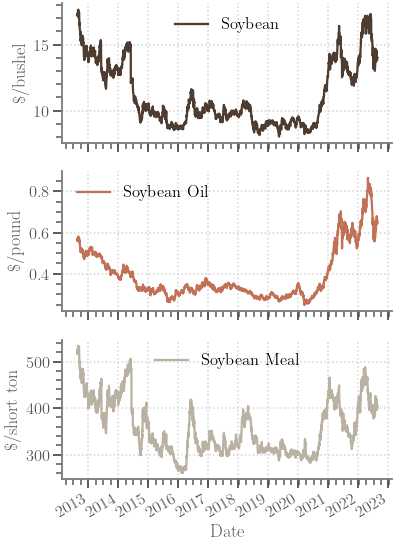

In [6]:
fig1 = plot_components(data);
savefig('04_Original_Time_Series')

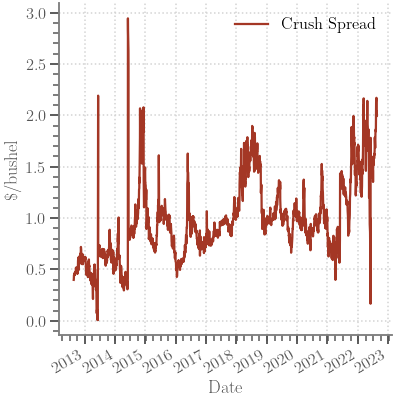

In [7]:
plot_spread(data)
savefig('04_Spread_Series')

In [8]:
data = data.resample("W").last().to_period("W")
data.tail()

,Soybean,Soybean Oil,Soybean Meal,Crush Spread
Date,,,,
2022-07-18/2022-07-24,13.1575,0.5787,382.0,1.6122
2022-07-25/2022-07-31,14.6850,0.6566,418.5,1.7446
2022-08-01/2022-08-07,14.0875,0.6397,405.1,1.8614
2022-08-08/2022-08-14,14.5425,0.6797,417.9,2.1280
2022-08-15/2022-08-21,14.0400,0.6570,402.3,2.0376


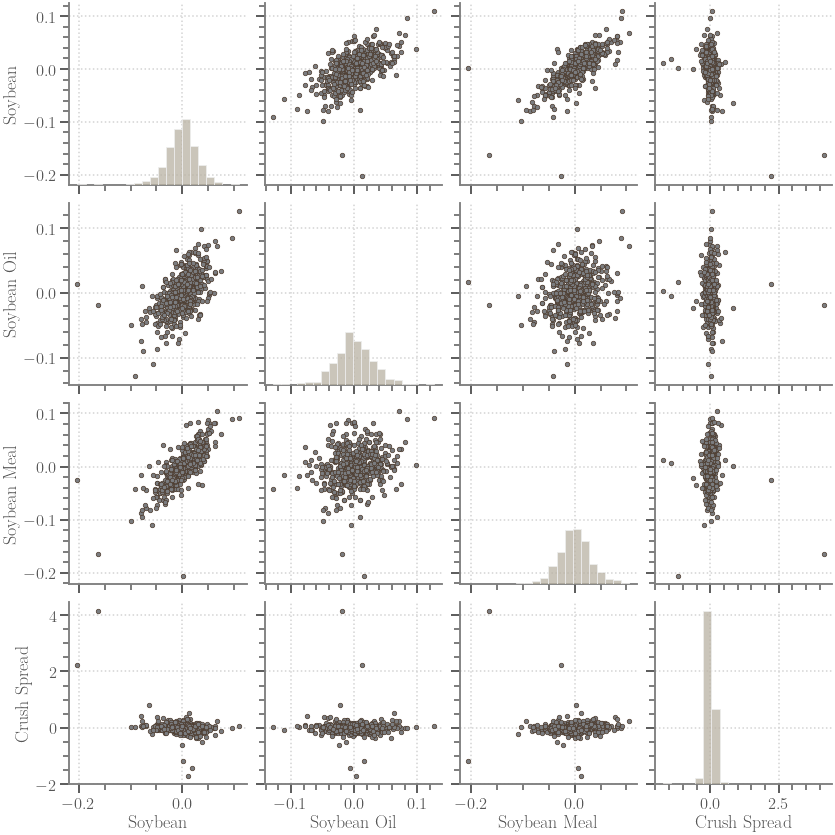

In [9]:
logrets_df = np.log(data).diff().dropna()
_ = sns.pairplot(logrets_df, height=3, aspect=1, diag_kind='hist',
    diag_kws = {'color': palette[2], 'bins': 20},
    plot_kws = {'color': palette[8], 'marker': ".", 'edgecolor': palette[0]})
savefig('04_PairPlot')

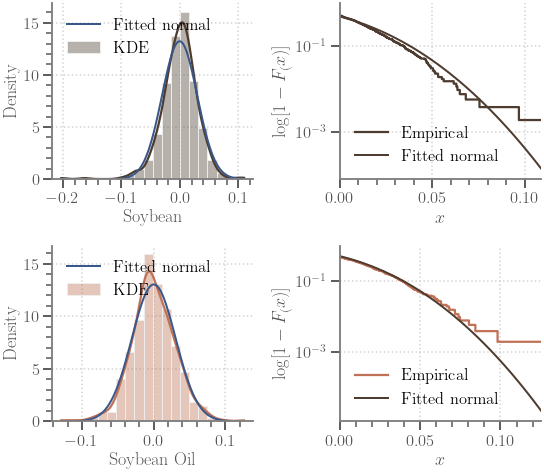

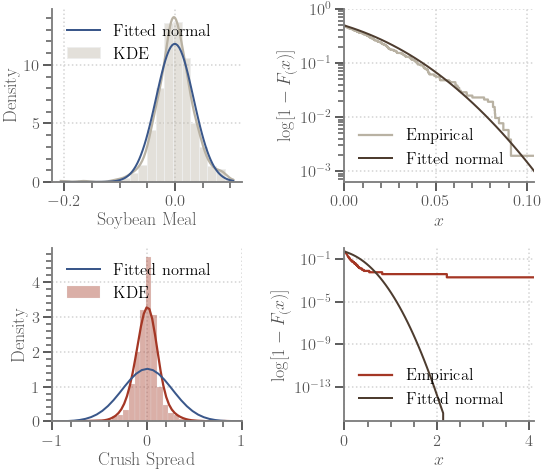

In [10]:
def plot_norm_fit(axes, data):
    xmin, xmax = data.min(), data.max()
    x = np.linspace(xmin, xmax, 100)
    fit = norm.fit(data)
    p = norm.pdf(x, *fit)
    axes.plot(x, p, linewidth=2, color = palette[13], label = 'Fitted normal')
    axes.legend(loc='upper left')

def plot_fit_survival(axes, data):
    xmin, xmax = data.min(), data.max()
    x = np.linspace(xmin, xmax, 100)
    fit = norm.fit(data)
    p = 1 - norm.cdf(x, *fit)
    axes.plot(x, p, linewidth=2, label='Fitted normal')

    
assets = ['Soybean', 'Soybean Oil', 'Soybean Meal', 'Crush Spread']
fig, ax = plt.subplots(2, 2, figsize=(8, 7))
norm_fits = [norm.fit(logrets_df[asset]) for asset in assets]

for (axis, asset, col) in zip(ax, assets[0:2], [0, 1]):
    sns.histplot(logrets_df[asset], bins=20 if col!=3 else 100, alpha=0.4, kde=True, stat='density', ax = axis[0],
                 color=palette[col], label = 'KDE')
    plot_norm_fit(axis[0], logrets_df[asset])
    
    sns.ecdfplot(logrets_df[asset], ax = axis[1], complementary=True, label='Empirical', color=palette[col])
    plot_fit_survival(axis[1], logrets_df[asset])
    axis[1].set_xlim(0, logrets_df[asset].max()*0.99)
    axis[1].set_yscale('log')
    axis[1].set_ylabel("$\log [1 - F_(x)]$")
    axis[1].set_xlabel("$x$")
    
    axis[1].legend()

plt.tight_layout()
savefig('04_TailAnalysis_1')

fig, ax = plt.subplots(2, 2, figsize=(8, 7))

for (axis, asset, col) in zip(ax, assets[2:4], [ 2, 3]):
    sns.histplot(logrets_df[asset], bins=20 if col!=3 else 100, alpha=0.4, kde=True, stat='density', ax = axis[0],
                 color=palette[col], label = 'KDE')
    plot_norm_fit(axis[0], logrets_df[asset])
    
    sns.ecdfplot(logrets_df[asset], ax = axis[1], complementary=True, label='Empirical', color=palette[col])
    plot_fit_survival(axis[1], logrets_df[asset])
    axis[1].set_xlim(0, logrets_df[asset].max()*0.99)
    axis[1].set_yscale('log')
    axis[1].set_ylabel("$\log [1 - F_(x)]$")
    axis[1].set_xlabel("$x$")
    
    axis[1].legend()

ax[-1][0].set_xlim(-1, 1)
plt.tight_layout()
savefig('04_TailAnalysis_2')

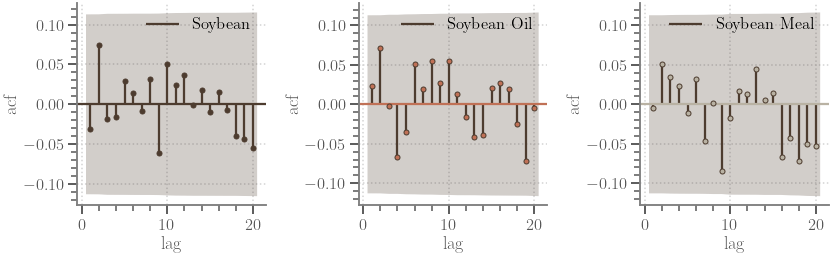

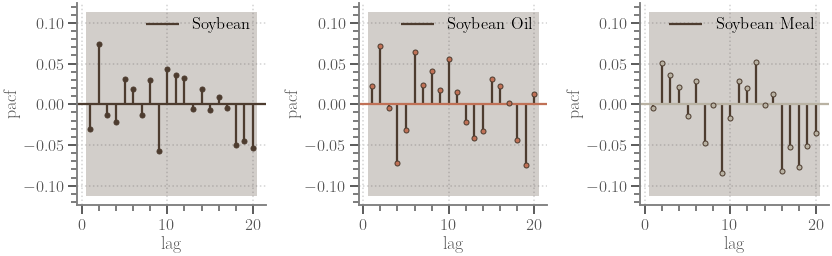

In [11]:
plt.figure(figsize=(12, 4))
zero=False
for ind, (asset, col) in enumerate(zip(assets[0:3], [0, 1, 2])):
    ax1 = plt.subplot(1, 3, ind+1)
    _ = tsaplots.plot_acf(logrets_df[asset], ax = ax1, zero=zero, alpha=0.01, lags=20, color=palette[col], mec=palette[0])
    ax1.set_xlabel("lag")
    ax1.set_ylabel("acf")
    ax1.legend([asset])
    ax1.set_title("")

plt.tight_layout()
savefig("04_ACF")

plt.figure(figsize=(12, 4))
zero=False
for ind, (asset, col) in enumerate(zip(assets[0:3], [0, 1, 2])):
    ax2 = plt.subplot(1, 3, ind+1)
    _ = tsaplots.plot_pacf(logrets_df[asset], ax = ax2, zero=zero, alpha = 0.01, lags=20, color=palette[col], mec=palette[0])
    ax2.set_ylabel("pacf")
    ax2.set_xlabel("lag")
    ax2.legend([asset])
    ax2.set_title("")

plt.tight_layout()
savefig("04_PACF")

In [12]:
from statsmodels.stats.diagnostic import acorr_ljungbox
def adfuller_test(data):
    result=adfuller(data)
    labels = ['ADF Test Statistic','p-value', '#Lags Used', 'Number of Observations']
    return dict(zip(labels, result))

results = {}
for asset in assets:
    results[asset] = adfuller_test(logrets_df[asset])

results = pd.DataFrame.from_dict(results, orient = 'index').iloc[:-1, 0:2].round(3)

savetab("Stationarity", results)
results

,ADF Test Statistic,p-value
Soybean,-15.138,0.0
Soybean Oil,-14.761,0.0
Soybean Meal,-22.843,0.0


In [13]:
from pmdarima.arima import auto_arima
{asset: auto_arima(logrets_df[asset], stationary=True) for asset in assets[0:3]}

{'Soybean': ARIMA(order=(0, 0, 0), scoring_args={}, suppress_warnings=True,
       with_intercept=False),
 'Soybean Oil': ARIMA(order=(0, 0, 0), scoring_args={}, suppress_warnings=True,
       with_intercept=False),
 'Soybean Meal': ARIMA(order=(0, 0, 0), scoring_args={}, suppress_warnings=True,
       with_intercept=False)}

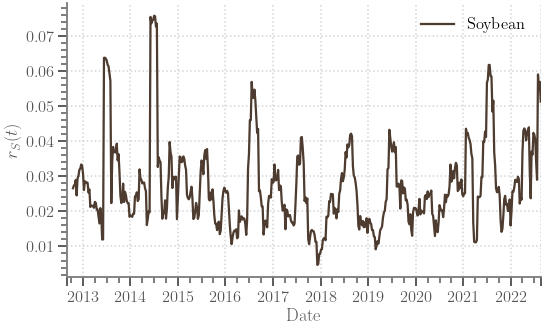

In [14]:
fig, ax = plt.subplots(figsize=(8, 5))

logrets_df[['Soybean']].rolling(8).std().plot(ax = ax, label=asset, color=palette[0])
ax.set_ylabel('$r_S(t)$')

plt.tight_layout()
savefig('04_Heteroskedasticity')

In [15]:
def auto_garch(data, max_p = 3, max_q = 3):
    asset_results = {}
    for asset in data.columns:
        models = {}
        for p in range(1, max_p + 1):
            for q in range(1, max_q + 1):
                model = arch_model(data[asset].to_timestamp(), mean='Constant', 
                                   vol='GARCH', p=p, q=q, dist='normal', rescale=True).fit(disp='off')
                models[(p, q)] = model.aic
        asset_results[asset] = models
    return asset_results

In [16]:
garch_choice = auto_garch(logrets_df[['Soybean', 'Soybean Oil', 'Soybean Meal']], max_p=4, max_q = 4)
garch_choice = pd.DataFrame.from_dict(garch_choice)
garch_choice['Average'] = garch_choice.mean(axis = 1)
garch_choice.sort_values(by='Average', inplace = True)
garch_choice.index.names = ["m", "n"]
savetab("GARCH_choice", garch_choice.round(2))
garch_choice

Soybean  Soybean Oil  Soybean Meal      Average
m n                                                     
2 3  2603.795779  2583.955201    348.974858  1845.575279
  2  2605.104463  2584.994289    346.687927  1845.595560
3 2  2607.104463  2586.994289    343.098653  1845.732468
4 1  2606.170628  2588.750259    343.714241  1846.211709
2 1  2610.234353  2584.806673    344.687927  1846.576317
  4  2605.795779  2584.299754    350.345063  1846.813532
3 1  2612.234353  2586.806673    341.714241  1846.918422
4 2  2608.170628  2588.994289    345.098653  1847.421190
3 3  2605.795780  2585.955206    350.918255  1847.556414
  4  2607.795779  2586.299754    351.093070  1848.396201
4 3  2607.183708  2587.955205    351.111230  1848.750048
  4  2609.183708  2588.299754    354.131018  1850.538160
1 1  2628.770066  2582.883760    345.298087  1852.317304
  2  2630.770065  2584.883760    344.241617  1853.298481
  3  2632.770065  2586.276509    346.241617  1855.096064
  4  2634.770065  2587.689679    348.122562  1856.860769

In [17]:
garch_models={}
garch_residuals ={}
for asset in assets:
    model = arch_model(logrets_df[asset].to_timestamp(),
                       mean='Constant', vol='GARCH', p=3, q=2, dist='normal', rescale=True)
    res = model.fit(disp='off')
    garch_models[asset] = res
    garch_residuals[asset] = res.resid/res.conditional_volatility

C:\Users\admin\anaconda3\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


In [18]:
garch_fit = pd.concat([pd.concat([mod.params, mod.std_err, mod.tvalues], axis = 1) for name, mod in garch_models.items() if name !="Crush Spread"], axis = 0).round(2)
garch_fit.index = pd.MultiIndex.from_product([assets[0:3], [r"$\mu$", r"$\omega$", r"$\alpha_1$", r"$\alpha_2$", 
                                                            r"$\beta_1$", r"$\beta_2$", r"$\beta_3$"]])
garch_fit.columns= ["Parameter", "Std. Error", "t-statistic"]
savetab("GARCH_fit", garch_fit)
garch_fit

Parameter  Std. Error  t-statistic
Soybean      $\mu$           -0.16        0.17        -0.93
             $\omega$         4.61        2.93         1.58
             $\alpha_1$       0.00        0.05         0.00
             $\alpha_2$       0.45        0.23         1.99
             $\beta_1$        0.00        0.12         0.00
             $\beta_2$        0.00        0.24         0.00
             $\beta_3$        0.13        0.18         0.74
Soybean Oil  $\mu$           -0.11        0.12        -0.97
             $\omega$         0.08        0.09         0.89
             $\alpha_1$       0.02        0.06         0.30
             $\alpha_2$       0.09        0.05         1.68
             $\beta_1$        0.00        0.17         0.00
             $\beta_2$        0.21        0.57         0.37
             $\beta_3$        0.68        0.51         1.34
Soybean Meal $\mu$           -0.03        0.02        -1.37
             $\omega$         0.05        0.01         3.86
             $\alpha_1$       0.10        0.07         1.36
             $\alpha_2$       0.18        0.13         1.37
             $\beta_1$        0.27        0.23         1.17
             $\beta_2$        0.00        0.23         0.00
             $\beta_3$        0.10        0.19         0.50

In [19]:
from scipy.stats import ttest_1samp
from scipy.stats import chi2
from statsmodels.stats.diagnostic import acorr_ljungbox

def ljungbox_test(res, lags=20):
    result=acorr_ljungbox(res, lags = lags, return_df = True)
    return result

results_lb = pd.concat([ljungbox_test(garch_residuals[asset], lags=20) for asset in assets[0:3]], axis = 1)
results_lb.columns = ['Test statistic', 'p-value']*3
results_lb.columns = pd.MultiIndex.from_product([results_lb.columns[0:2], assets[0:3]])

min_pval_idx = results_lb['p-value'].idxmin(axis=0)
min_pvals = []
for i in [0, 1, 2]:
    min_pvals.append(results_lb.iloc[min_pval_idx[i] - 1, [i, i+3]])
results_lb = pd.concat(min_pvals, axis = 0).to_frame().T
results_lb.columns = ['Test statistic', 'p-value']*3
results_lb.index = ["Ljung-Box"]
results_lb

,Test statistic,p-value,Test statistic,p-value,Test statistic,p-value
Ljung-Box,10.002181,0.168949,0.664029,0.088106,21.438872,0.543889


In [20]:
def chisq_test(sample, popvar=1, alpha = 0.05):
    df = len(sample) - 1
    test_stat = (df)/popvar * sample.var()
    pval =  chi2.cdf(test_stat, df=df)
    return test_stat, pval, not (alpha/2 <pval<1-alpha/2)

results=[]
for asset in assets[0:3]:
    mean_test = ttest_1samp(garch_residuals[asset], popmean=0)
    var_test = chisq_test(garch_residuals[asset], popvar=1)
    results.append(pd.DataFrame.from_dict({'t': {'Test statistic': mean_test.statistic, 
                                                      'p-value': mean_test.pvalue},
                                           r'$\chi^2$': {'Test statistic':var_test[0], 
                                                         'p-value': var_test[1]}}))
results = pd.concat(results, axis = 0).T
results = pd.concat([results_lb, results], axis=0) 

savetab("IID01Test", results.round(3))
results.columns = pd.MultiIndex.from_product([assets[0:3], results.columns[0:2]])
results

Soybean              Soybean Oil             Soybean Meal  \
          Test statistic   p-value Test statistic   p-value Test statistic   
Ljung-Box      10.002181  0.168949       0.664029  0.088106      21.438872   
t               1.010321  0.312812       0.657138  0.511383       1.583164   
$\chi^2$      519.908893  0.507121     520.626525  0.515990     518.437896   

                     
            p-value  
Ljung-Box  0.543889  
t          0.113992  
$\chi^2$   0.488908

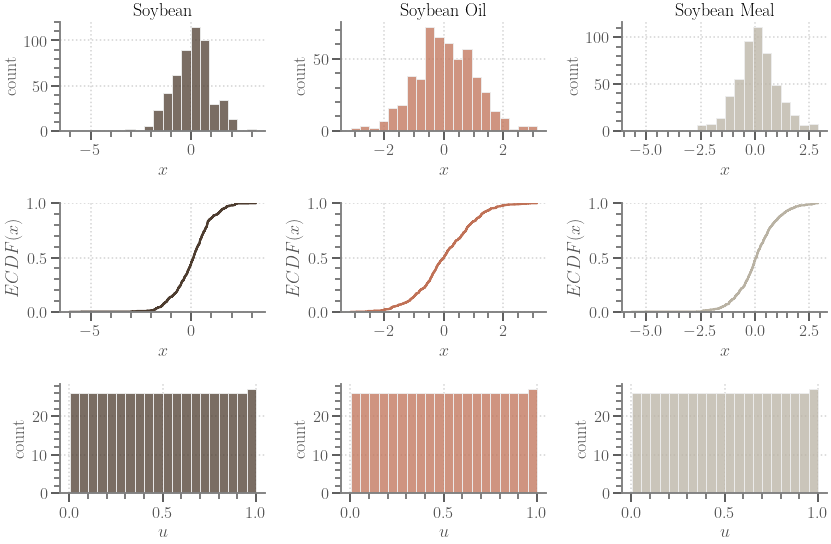

In [21]:
from scipy.interpolate import interp1d
def ecdf(x):
    x = sorted(x)
    y = ECDF(x)
    f = interp1d(x, y(x), fill_value=(0, 1))
    return f

ecdfs = {asset: ecdf(garch_residuals[asset]) for asset in assets}

fig = plt.figure(figsize=(12, 8))
for ind, asset in enumerate(assets[0:3]):
    ax = plt.subplot(3, 3, ind +1)
    sns.histplot(garch_residuals[asset], stat='count', bins=20, ax = ax, color=palette[ind])
    ax.set_ylabel("count")
    ax.set_xlabel("$x$")
    ax.set_title(asset)

for ind, asset in enumerate(assets[0:3]):
    ax = plt.subplot(3, 3, ind + 4)
    sns.ecdfplot(garch_residuals[asset], ax = ax, color=palette[ind])
    ax.set_ylabel("$ECDF(x)$")
    ax.set_xlabel("$x$")

for ind, asset in enumerate(assets[0:3]):
    ax = plt.subplot(3, 3, ind + 7)
    sns.histplot(ecdfs[asset](garch_residuals[asset]), stat='count', bins=20, ax = ax, color=palette[ind])
    ax.set_ylabel("count")
    ax.set_xlabel('$u$')

plt.tight_layout()
savefig('04_ECDFs')

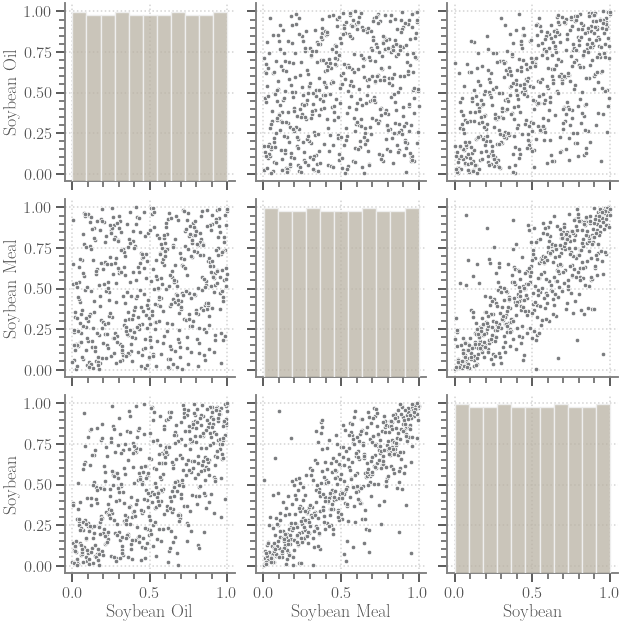

In [22]:
garch_residuals_u_df = logrets_df.iloc[:, 1:].copy()
for ind, asset in enumerate(assets):
    garch_residuals_u_df[asset] = ecdfs[asset](garch_residuals[asset])
    
_ = sns.pairplot(garch_residuals_u_df.drop(['Crush Spread'], axis = 1), height=3, aspect=1, kind='scatter', diag_kind='hist',
                 diag_kws = {'color': palette[2]},
                 plot_kws = {'color': palette[8], 'marker': "."})
savefig('04_PairPlotCopulaScale')

In [23]:
from itertools import permutations

family_set = pv.parametric
controls = pv.FitControlsVinecop(family_set = family_set, selection_criterion='aic',
                                 show_trace = True, parametric_method='itau')

results = {}
for perm in permutations([1, 2, 3]):
    vine = pv.Vinecop(data=garch_residuals_u_df.drop(['Crush Spread'], axis = 1), controls=controls, 
                      structure=pv.DVineStructure(order=perm))
    results["".join([str(i) for i in perm])] = [vine.aic(), vine.loglik()]
results = pd.DataFrame.from_dict(results, orient='index')
results.columns = ['AIC', 'log-lik']
results.sort_values(by = 'AIC', inplace=True)
savetab("VineAICs", results.round(3))
results

,AIC,log-lik
132,-940.333412,473.166706
231,-940.333412,473.166706
123,-927.937355,466.968677
321,-927.937355,466.968677
213,-923.761164,465.880582
312,-923.761164,465.880582


In [24]:
vine.get_pair_copula(1, 0)

<pyvinecopulib.Bicop>
Frank, parameters = 6.43686

In [25]:
best_struct = results.head(1).index[0]
vine = pv.Vinecop(data=garch_residuals_u_df.drop(['Crush Spread'], axis = 1), controls=controls, 
                  structure=pv.DVineStructure(order=[int(i) for i in best_struct]))
vine

<pyvinecopulib.Vinecop>
** Tree: 0
1,3 <-> Gaussian, parameters = 0.586358
3,2 <-> Frank, parameters = 8.30214
** Tree: 1
1,2 | 3 <-> Frank, parameters = -4.28189

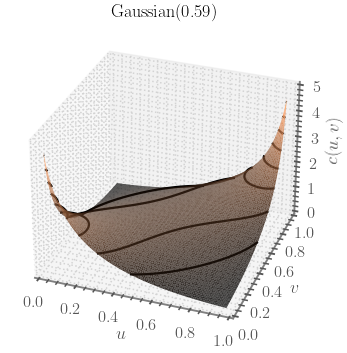

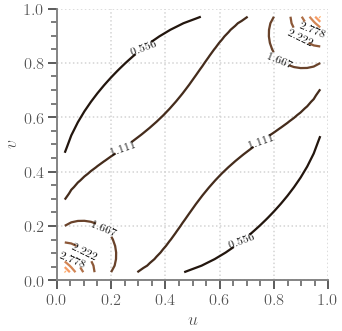

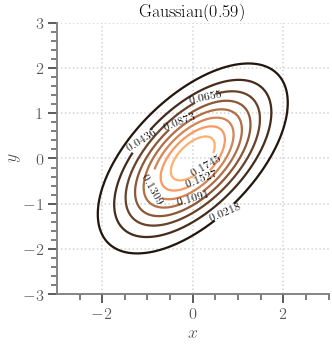

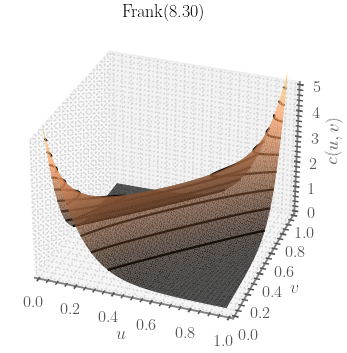

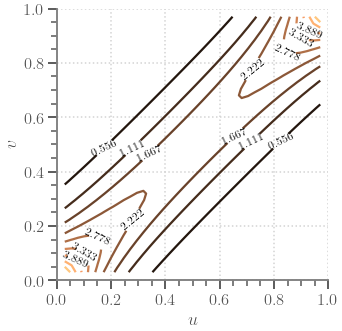

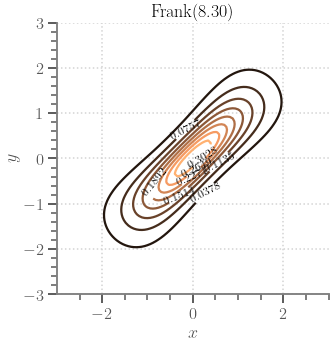

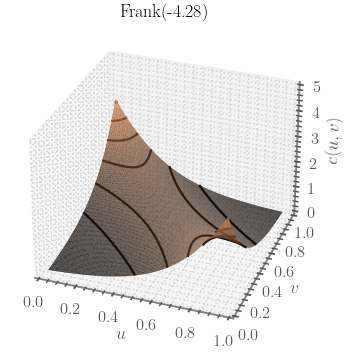

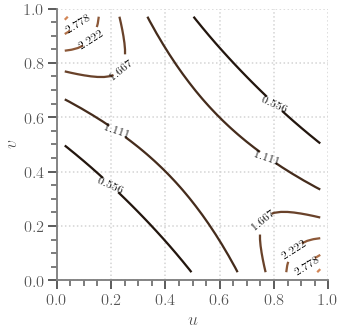

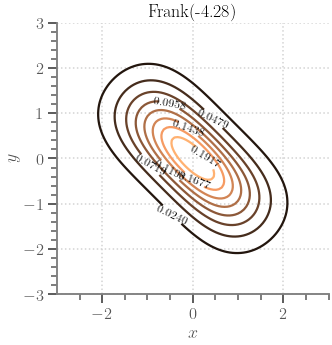

In [26]:
params = {'kw_surface': {"eps":0.03, "zmax":5, "nx":100},
          'kw_contour': {"eps":0.03, "zmax":5, "nx":40, "levels":10},
          "kw_contour_n": {"levels":10}}

for cop, ids in zip(vine.pair_copulas[0], [(1,3), (3,2)]):
    fam, param =  cop.family.name.capitalize(), cop.parameters.ravel()[0]   
    names = [garch_residuals_u_df.drop(['Crush Spread'], axis=1).columns[id_ - 1] for id_ in ids]
    fig, ax = plot_copula_density(cop, **params['kw_surface'])
    ax.set_xlabel("$u$")
    ax.set_ylabel("$v$")
    ax.set_zlabel("$c(u,v)$")
    ax.set_title(f"{fam}({param:.2f})")
    savefig(f'04_Fitted_{names[0]}_{names[1]}_density');
    
    fig, ax = plot_copula_contour(cop, **params['kw_contour'])
    ax.set_xlabel("$u$")
    ax.set_ylabel("$v$")
    savefig(f'04_Fitted_{names[0]}_{names[1]}_contour');
        
    fig, ax = plot_copula_contour(cop, normalize=True, **params['kw_contour_n'])
    ax.set_xlabel("$x$")
    ax.set_ylabel("$y$")
    ax.set_title(f"{fam}({param:.2f})")
    savefig(f'04_Fitted_{names[0]}_{names[1]}_contour_norm')
    

fam, param =  vine.get_family(1, 0).name.capitalize(), vine.get_parameters(1, 0).ravel()[0]   
cop = vine.get_pair_copula(1, 0)
names = ['Soybean Oil', 'Soybean Meal']
fig, ax = plot_copula_density(cop, **params['kw_surface'])
ax.set_xlabel("$u$")
ax.set_ylabel("$v$")
ax.set_zlabel("$c(u,v)$")
ax.set_title(f"{fam}({param:.2f})")
savefig(f'04_Fitted_conditional_density');
    
fig, ax = plot_copula_contour(cop, **params['kw_contour'])
ax.set_xlabel("$u$")
ax.set_ylabel("$v$")
savefig(f'04_Fitted_conditional_contour');
        
fig, ax = plot_copula_contour(cop, normalize=True, **params['kw_contour_n'])
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.set_title(f"{fam}({param:.2f})")
savefig(f'04_Fitted_conditional_contour_norm')

In [27]:
from datetime import date
from copulas.multivariate.base import Multivariate

In [28]:
def ppf_Soybean(x):
    return np.quantile(garch_residuals["Soybean"], x)
def ppf_SoybeanOil(x):
    return np.quantile(garch_residuals["Soybean Oil"], x)
def ppf_SoybeanMeal(x):
    return np.quantile(garch_residuals["Soybean Meal"], x)

ppfs={'Soybean': ppf_Soybean,
      'Soybean Oil': ppf_SoybeanOil,
      'Soybean Meal': ppf_SoybeanMeal}

def simulation_run(copula, n_months, history, plot=False):
    
    assets = ['Soybean Oil', 'Soybean Meal', 'Soybean']
    if isinstance(copula, pv.Vinecop):
        data_uniform = pd.DataFrame(copula.simulate(n=n_months), columns = assets)
    elif isinstance(copula, Multivariate):
        data_uniform = copula.sample(n_months)[assets]
    else:
        raise ValueError("Unknown type of copula.")
    sim_garch_residuals = pd.DataFrame.from_dict({asset: ppfs[asset](data_uniform[asset]) for asset in assets})

    copula_garch_simulated_logrets = {}
    for asset in assets:
        mu, omega, alpha1, alpha2, beta1, beta2, beta3 = garch_models[asset].params
        scale = garch_models[asset].scale
        e_t = sim_garch_residuals[asset]

        epsilon_t = [garch_models[asset].resid[0]]
        sigma2_t = [garch_models[asset].conditional_volatility[0]**2,
                    garch_models[asset].conditional_volatility[1]**2,
                    garch_models[asset].conditional_volatility[2]**2]

        for e in e_t:
            epsilon_t.append(e*np.sqrt(sigma2_t[-1]))
            sigma2_t.append(omega + 
                            alpha1*epsilon_t[-1]**2 + alpha2*epsilon_t[-2]**2 + 
                            beta1*sigma2_t[-1] + beta2*sigma2_t[-2] + beta3*sigma2_t[-3])

        copula_garch_simulated_logrets[asset] = np.array(epsilon_t)/scale
    copula_garch_simulated_logrets = pd.DataFrame.from_dict(copula_garch_simulated_logrets).iloc[1:, :]
    copula_garch_simulated_logrets.index = pd.date_range(start=(history.index[-1]+1).to_timestamp(), 
                                                         end=(history.index[-1]+len(copula_garch_simulated_logrets.index)+1).to_timestamp(), 
                                                         freq='W').to_period("W")
    sim_traj_df = history.iloc[-1, 0:3]*(np.exp(copula_garch_simulated_logrets.cumsum()))
    sim_traj_df = sim_traj_df[['Soybean', 'Soybean Oil', 'Soybean Meal']]
    sim_traj_df['Crush Spread'] = sim_traj_df['Soybean Meal']*0.022 + sim_traj_df['Soybean Oil']*11 - sim_traj_df['Soybean']
    sim_traj_df = pd.concat([data.iloc[-1, :].to_frame().T, sim_traj_df], axis = 0) 
    if plot:
        #fig, ax = plt.subplots(2, 1, figsize=(8, 8))
        fig1 = plt.figure(figsize=(12, 8))
        ax11 = fig1.add_subplot(321)
        ax12 = fig1.add_subplot(323, sharex=ax11)
        ax13 = fig1.add_subplot(325, sharex=ax11)
        
        ax14 = fig1.add_subplot(122)
        history['Soybean'].iloc[-20:].plot(legend=True, ax = ax11, color=palette[0])
        history['Soybean Oil'].iloc[-20:].plot(legend=True, ax = ax12, color=palette[1])
        history['Soybean Meal'].iloc[-20:].plot(legend=True, ax = ax13, color=palette[2])
        history['Crush Spread'].iloc[-20:].plot(legend=True, ax = ax14, color=palette[3])
        
        sim_traj_df['Soybean'].plot(label='Simulation', ax = ax11, color=palette[0], linestyle="--")
        sim_traj_df['Soybean Oil'].plot(label='Simulation', ax = ax12, color=palette[1], linestyle="--")
        sim_traj_df['Soybean Meal'].plot(label='Simulation', ax = ax13, color=palette[2], linestyle="--")
        sim_traj_df['Crush Spread'].plot(label='Simulation', ax = ax14, color=palette[3], linestyle="--")
        ax11.legend()
        ax12.legend()
        ax13.legend()
        ax14.legend()
        
        plt.tight_layout()

    return sim_traj_df

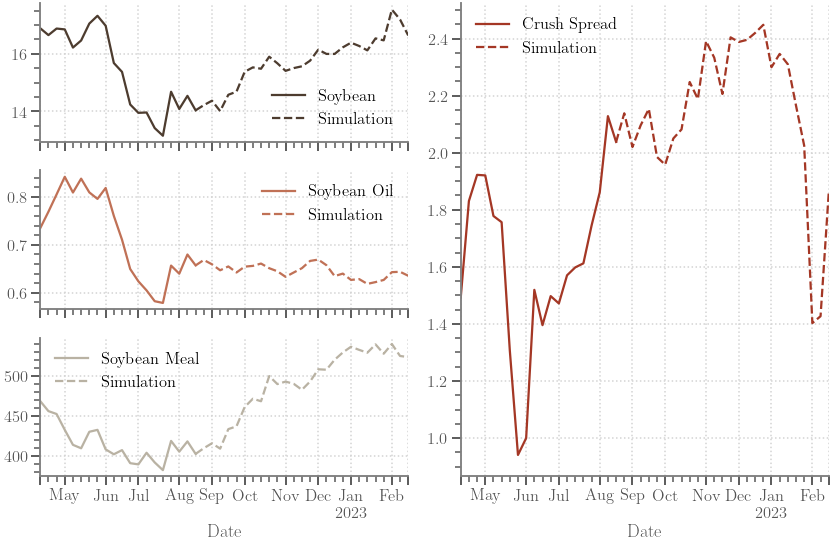

In [29]:
sim = simulation_run(vine, 26, plot = True, history=data)

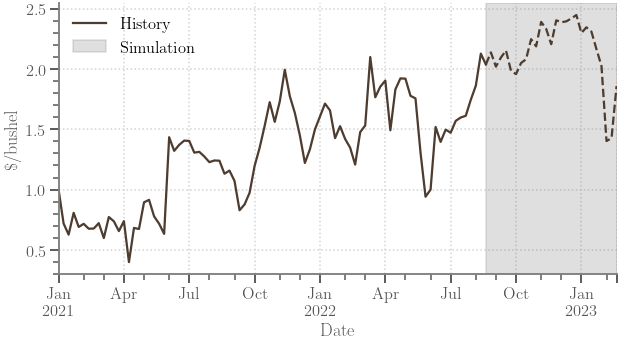

In [30]:
fig, ax = plt.subplots()
data['Crush Spread']["2021":].plot(ax = ax, color=palette[0], label = 'History') 
ax.axvspan(data.index[-1], sim.index[-1], color="grey", alpha=0.25, label='Simulation')
ax.legend()
sim['Crush Spread'].plot(ax = ax, color=palette[0], linestyle="--")
ax.set_ylabel("\$/bushel")
savefig('04_SimulationSpread')

In [31]:
MC = 1000
K = 2
T = 0.5
r = 0.05

trajectories = np.zeros((int(T*52) + 1, 4, MC))

for mc in range(MC):
    simulation = simulation_run(vine, int(T*52), history=data)
    trajectories[:, :, mc] = simulation

np.save(f"{TEXTABS}/Simulated_trajectories", trajectories)

In [32]:
def payoff(spread_T, strike, option_type = "CALL"):
    if option_type == "CALL":
        payoff_ = np.maximum(spread_T - strike, 0)
    else:
        payoff_ = np.maximum(strike - spread_T, 0)
    return payoff_

spreads_at_expiry = trajectories[-1, -1, :]
spot = data['Crush Spread'][-1].round(2)
results = []
for option_type in ['CALL', 'PUT']:
    results.append(pd.DataFrame.from_dict({f"{strike:.2f}": [payoff(spreads_at_expiry, strike = strike,
                                                                    option_type=option_type).mean()*np.exp(-r*T),
                                                             payoff(spreads_at_expiry, strike = strike,
                                                                    option_type=option_type).std()*np.exp(-r*T)/np.sqrt(MC)] for strike in np.linspace(0.5*spot, 1.5*spot, 10)}))
    
results = pd.concat(results, axis = 1).T
results.columns = ['Price', 'Std. Err.']
results.index = pd.MultiIndex.from_product([['Call', 'Put'], [f"{x:.2f}" for x in np.linspace(1, 4, 10)]])
results = pd.concat([results.loc['Call'], results.loc['Put']], axis = 1)
results.index = [x if i!=3 else "ATM" for i, x in enumerate(results.index)]

savetab("OptionPrices", results.round(2))
results.columns = pd.MultiIndex.from_product([['Call', 'Put'], ['Price', 'Std. Err.']])
results

Call                 Put          
         Price Std. Err.     Price Std. Err.
1.00  1.372627  0.036063  0.095716  0.013939
1.33  1.186887  0.034793  0.131046  0.015361
1.67  1.012850  0.033279  0.178079  0.017010
ATM   0.850198  0.031610  0.236497  0.018875
2.33  0.703199  0.029745  0.310568  0.020881
2.67  0.574731  0.027696  0.403170  0.022958
3.00  0.463315  0.025571  0.512825  0.025070
3.33  0.370836  0.023394  0.641416  0.027103
3.67  0.293502  0.021266  0.785153  0.029060
4.00  0.230691  0.019230  0.943412  0.030863

<ipython-input-33-e1078d47e942>:22: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = plt.colorbar(sm)


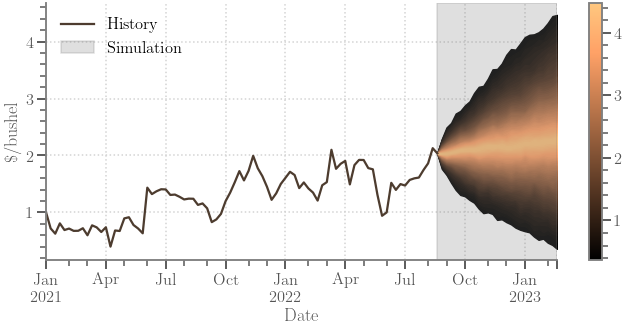

In [33]:
spread_trajectories = pd.DataFrame(trajectories[:, -1, :], index = simulation.index)

n = 100 # change this value for the number of iterations/percentiles
colormap = cm.copper # change this for the colormap of choice
percentiles = np.linspace(5,95,n)

SampleData=spread_trajectories
SDist=np.zeros((SampleData.shape[0],n))
for i in range(n):
    for t in range(SampleData.shape[0]):
        SDist[t,i]=np.percentile(SampleData.iloc[t,:],percentiles[i])

half = int((n-1)/2)

fig, (ax1) = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(10, 5))
data['Crush Spread']["2021":].plot(label='History')

for i in range(half):
    ax1.fill_between(SampleData[0].to_timestamp().index, SDist[:, i],SDist[:, -(i+1)], color=colormap(i/half))
ax1.axvspan(data.index[-1], SampleData.index[-1], color="grey", alpha=0.25, label = "Simulation")
sm = plt.cm.ScalarMappable(cmap=colormap, norm=plt.Normalize(vmin=SDist.min(), vmax=SDist.max()))
cbar = plt.colorbar(sm)

ax1.set_xlabel('Date')
ax1.set_xlim("2021", SampleData.index[-1])
ax1.set_ylabel('\$/bushel')
ax1.legend()
fig.tight_layout()
savefig('04_CrushSpread_pred')

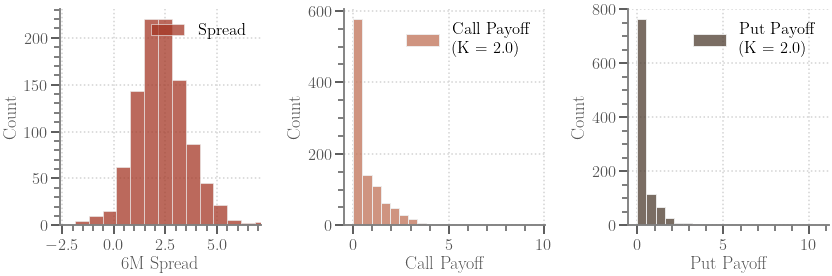

In [34]:
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
strike = 2.0
sns.histplot(spreads_at_expiry, kde=False, ax=ax[0], bins=30, label=f'Spread', color=palette[3])
sns.histplot(payoff(spreads_at_expiry, strike = strike,
                    option_type="CALL"), kde=False, ax=ax[1], bins=20, label=f'Call Payoff\n\t(K = {strike})', color=palette[1])
sns.histplot(payoff(spreads_at_expiry, strike = strike,
                    option_type="PUT"), kde=False, ax=ax[2], bins=20, label=f'Put Payoff\n\t(K = {strike})', color=palette[0])
plt.tight_layout()
ax[0].legend()
ax[0].set_xlabel('6M Spread')
ax[0].set_xlim(np.quantile(spreads_at_expiry, [0.001, 0.999]))
ax[1].legend()
ax[1].set_xlabel('Call Payoff')
ax[2].legend()
ax[2].set_xlabel('Put Payoff')
savefig("04_PayoffsDistribution");

In [35]:
from copulas.multivariate import GaussianMultivariate

multigauss = GaussianMultivariate()
multigauss.fit(garch_residuals_u_df.drop(['Crush Spread'], axis = 1))

C:\Users\admin\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:5003: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)
C:\Users\admin\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2494: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


In [36]:
MC = 1000
K = 2
T = 0.5
r = 0.05

trajectories_gmv = np.zeros((int(T*52) + 1, 4, MC))

for mc in range(MC):
    simulation = simulation_run(multigauss, int(T*52), history=data)
    trajectories_gmv[:, :, mc] = simulation

np.save(f"{TEXTABS}/Simulated_trajectories_GaussianMV", trajectories_gmv)

C:\Users\admin\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1167: UserWarning: Attempting to set identical left == right == 2747.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)
C:\Users\admin\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1167: UserWarning: Attempting to set identical left == right == 2747.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)


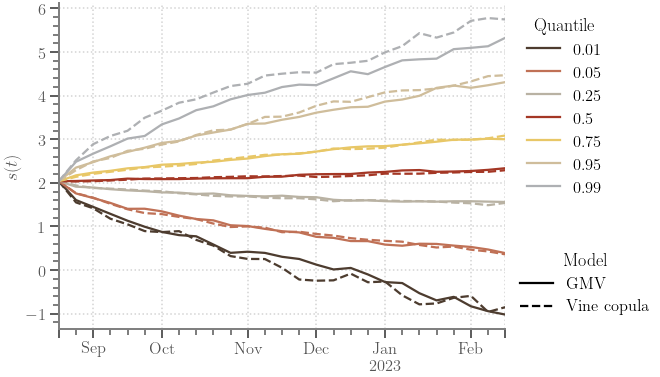

In [37]:
fig, ax = plt.subplots(figsize=(8, 6))


spread_trajectories_gmv = pd.DataFrame(trajectories_gmv[:, -1, :], index = simulation.index)
spread_trajectories_gmv.quantile([0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99], axis = 1).T.plot(legend=True, ax = ax, color =palette)
spread_trajectories = pd.DataFrame(trajectories[:, -1, :], index = simulation.index)
spread_trajectories.quantile([0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99], axis = 1).T.plot(ax = ax, linestyle="--", color=palette, legend=False)
ax.legend([0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99], title = "Quantile", bbox_to_anchor=(1.25, 1.0), loc="upper right")
ax.set_ylabel("$s(t)$")

ax2 = ax.twinx()
spread_trajectories_gmv.iloc[:1, 0].plot(linestyle="-", color='black', label="GMV", ax = ax2)
spread_trajectories.iloc[:1, 0].plot(linestyle="--", color='black', label="Vine copula", ax = ax2)
ax2.get_yaxis().set_visible(False)
ax2.legend(loc='lower left', title = "Model", bbox_to_anchor = (1.0, 0.0))
ax2.set_xlim(spread_trajectories.index[0], spread_trajectories.index[-1]);
savefig("04_MVG_Vine_quantile_comparison")

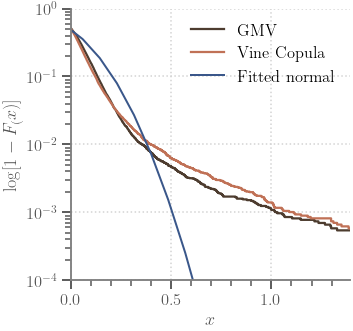

In [39]:
def plot_fit_survival(axes, data, color=palette[13]):
    xmin, xmax = data.min(), data.max()
    x = np.linspace(xmin, xmax, 100)
    fit = norm.fit(data)
    p = 1 - norm.cdf(x, *fit)
    axes.plot(x, p, color = color, linewidth=2, label='Fitted normal')

fig, ax = plt.subplots(figsize=(5, 5))
sns.ecdfplot(np.log(spread_trajectories_gmv).diff().unstack(), ax = ax, complementary=True, label='Empirical')
sns.ecdfplot(np.log(spread_trajectories).diff().unstack(), ax = ax, complementary=True, label='Empirical')

plot_fit_survival(ax, np.log(spread_trajectories_gmv).diff().unstack().dropna())

ax.set_xlim(0, 1.39)
ax.set_yscale('log')
ax.set_ylabel("$\log [1 - F_(x)]$")
ax.set_xlabel("$x$")
ax.set_ylim(10**(-4), 1)
ax.legend(['GMV', 'Vine Copula', 'Fitted normal'])
savefig("04_TailComparison")